In [1]:

import matplotlib.pyplot as plt
from epidexus import Location, EpidexusModel, Person, SEIR
from itinerary_entries import FixedWeekItineraryEntry
from datetime import datetime, time, timedelta

start_date = datetime(year=2020, month=3, day=29)
sim_model = EpidexusModel(start_date, sim_time_step=timedelta(hours=1))

vks = Location(name="Væsterkæret Skole", infection_probability=0.01)

vks_it = FixedWeekItineraryEntry(vks, start_date.date(), monday=(time(8),time(14)),
                                                         tuesday=(time(8),time(14)),
                                                         wednesday=(time(8),time(14)),
                                                         thursday=(time(8),time(14)),
                                                         friday=(time(8),time(14)))

for i in range(30):
    hl = Location("Home-" + str(i), infection_probability=0.05)
    school_kid = Person(sim_model.next_id(), sim_model, hl)
    school_kid.itinerary.add_entry(vks_it)
    parent1 = Person(sim_model.next_id(), sim_model, hl)
    parent2 = Person(sim_model.next_id(), sim_model, hl)
    sim_model.add_person(school_kid)
    sim_model.add_person(parent1)
    sim_model.add_person(parent2)

# Hacking agent 0 to be infectious
sim_model.schedule.agents[0].infect()
sim_model.schedule.agents[0].infection_state.seir = SEIR.INFECTED

for i in range(800):
    sim_model.step()

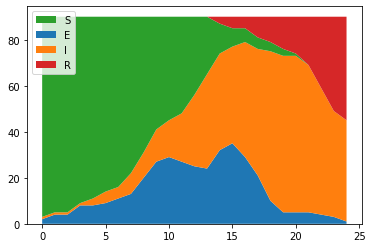

In [2]:
seir = sim_model.datacollector.get_model_vars_dataframe()
ax = plt.subplot(1,1,1)
ax.stackplot(seir.axes[0], seir["E"], seir["I"], seir["S"], seir["R"], labels=["E", "I", "S", "R"])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[i] for i in [2,0,1,3]], [labels[i] for i in [2,0,1,3]],loc='upper left')